# May 13th

In [18]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [19]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [20]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [21]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [22]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-13', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [23]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,Cardano's Sundae Swap launch date confirmed! I...
1,Michael Saylor's Bitcoin Average: ~$29534\n\nP...
2,Bitcoin 3-month Market cap is down -30.1% to 8...
3,@yvtweets and then .... #Bitcoin
4,@rastled @GaryGensler @GaryGensler is a power ...
5,@JohnTerry26 @RobertZamora25 #bluesparrow will...
6,"@airdropinspect Wonderful project, this projec..."
7,2 hour symmetrical triangle on the verge of br...
8,"- \nBTC price: $43,075 / £31,498 \n\n23.21 Nak..."
9,Top 10 Coins by Social volume over the last 24...


In [24]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [25]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,Cardano's Sundae Swap launch date confirmed! I...,Cardano's Sundae Swap launch date confirmed! I...
1,Michael Saylor's Bitcoin Average: ~$29534\n\nP...,Michael Saylor's Bitcoin Average: ~$29534Profi...
2,Bitcoin 3-month Market cap is down -30.1% to 8...,Bitcoin 3-month Market cap is down -30.1% to 8...
3,@yvtweets and then .... #Bitcoin,@yvtweets and then .... Bitcoin
4,@rastled @GaryGensler @GaryGensler is a power ...,@rastled @GaryGensler @GaryGensler is a power ...


In [26]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,Cardano's Sundae Swap launch date confirmed! I...,Cardano's Sundae Swap launch date confirmed! I...,0.550000,0.250000
1,Michael Saylor's Bitcoin Average: ~$29534\n\nP...,Michael Saylor's Bitcoin Average: ~$29534Profi...,0.400000,-0.150000
2,Bitcoin 3-month Market cap is down -30.1% to 8...,Bitcoin 3-month Market cap is down -30.1% to 8...,0.419444,-0.190278
3,@yvtweets and then .... #Bitcoin,@yvtweets and then .... Bitcoin,0.000000,0.000000
4,@rastled @GaryGensler @GaryGensler is a power ...,@rastled @GaryGensler @GaryGensler is a power ...,1.000000,0.000000
5,@JohnTerry26 @RobertZamora25 #bluesparrow will...,@JohnTerry26 @RobertZamora25 will take over t...,0.000000,0.000000
6,"@airdropinspect Wonderful project, this projec...","@airdropinspect Wonderful project, this projec...",0.760000,0.803333
7,2 hour symmetrical triangle on the verge of br...,2 hour symmetrical triangle on the verge of br...,0.000000,0.000000
8,"- \nBTC price: $43,075 / £31,498 \n\n23.21 Nak...","- BTC price: $43,075 / £31,498 23.21 Naks per ...",0.357143,0.000000
9,Top 10 Coins by Social volume over the last 24...,Top 10 Coins by Social volume over the last 24...,0.211111,0.177778


In [27]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [28]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,Cardano's Sundae Swap launch date confirmed! I...,Cardano's Sundae Swap launch date confirmed! I...,0.550000,0.250000,Positive
1,Michael Saylor's Bitcoin Average: ~$29534\n\nP...,Michael Saylor's Bitcoin Average: ~$29534Profi...,0.400000,-0.150000,Negative
2,Bitcoin 3-month Market cap is down -30.1% to 8...,Bitcoin 3-month Market cap is down -30.1% to 8...,0.419444,-0.190278,Negative
3,@yvtweets and then .... #Bitcoin,@yvtweets and then .... Bitcoin,0.000000,0.000000,Neutral
4,@rastled @GaryGensler @GaryGensler is a power ...,@rastled @GaryGensler @GaryGensler is a power ...,1.000000,0.000000,Neutral
5,@JohnTerry26 @RobertZamora25 #bluesparrow will...,@JohnTerry26 @RobertZamora25 will take over t...,0.000000,0.000000,Neutral
6,"@airdropinspect Wonderful project, this projec...","@airdropinspect Wonderful project, this projec...",0.760000,0.803333,Positive
7,2 hour symmetrical triangle on the verge of br...,2 hour symmetrical triangle on the verge of br...,0.000000,0.000000,Neutral
8,"- \nBTC price: $43,075 / £31,498 \n\n23.21 Nak...","- BTC price: $43,075 / £31,498 23.21 Naks per ...",0.357143,0.000000,Neutral
9,Top 10 Coins by Social volume over the last 24...,Top 10 Coins by Social volume over the last 24...,0.211111,0.177778,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


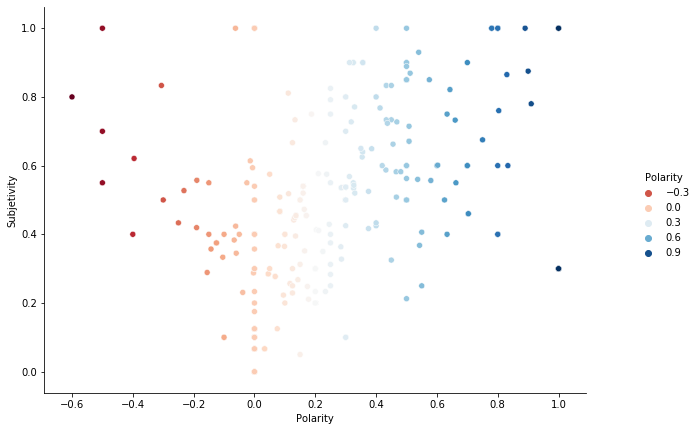

In [29]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

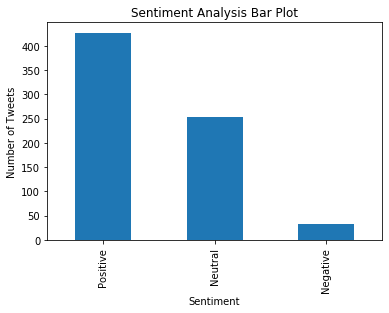

In [30]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [31]:
df['Sentiment'].value_counts()

Positive    427
Neutral     253
Negative     32
Name: Sentiment, dtype: int64

In [32]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[427, 253, 32]

In [33]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[3, 'Sentiment'] = 'day 4'
dfs.loc[3, 'Positive'] = lst_df[0]
dfs.loc[3, 'Neutral'] = lst_df[1]
dfs.loc[3, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     540.0    414.0      46.0
1     day 2     542.0    412.0      46.0
2     day 3     578.0    377.0      45.0
3     day 4     427.0    253.0      32.0
4     day 5     391.0    219.0      25.0
5     day 6     402.0    233.0      28.0


In [34]:
#424 314 58